In [1]:
import pandas as pd
import numpy as np
import folium
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import math
from datetime import datetime, timedelta
from tqdm import tqdm

In [2]:
month_list = []
for i in range(1, 13):
    if i < 10:
        month_list.append('0'+str(i))
    else:
        month_list.append(str(i))

In [3]:
month_list

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [4]:
for m in month_list[5:]:
    if m=='02':
        data = pd.read_csv(f'./data/AIS_2017_{m}_Zone10/AIS_ASCII_by_UTM_Month/2017_v2/AIS_2017_{m}_Zone10.csv')
    else:
        data = pd.read_csv(f'./data/AIS_2017_{m}_Zone10/AIS_ASCII_by_UTM_Month/2017/AIS_2017_{m}_Zone10.csv')
    LAT = (data['LAT'] >= 45) & (data['LAT'] <= 50)
    LON = (data['LON'] >= -126) & (data['LON'] <= -122)
    fuca = data[LAT & LON]
    del data
    LEN = ~fuca['Length'].isna()
    fuca = fuca[LEN]
    fuca.reset_index(drop=True, inplace=True)
    print(f'saving fuca_{m}.csv...')
    fuca.to_csv(f'./data/fuca/fuca_{m}.csv', index=False)
    print('done')
    del fuca

saving fuca_07.csv...
done
saving fuca_08.csv...
done
saving fuca_09.csv...
done
saving fuca_10.csv...
done
saving fuca_11.csv...
done
saving fuca_12.csv...
done


In [4]:
mmsi = []
for m in month_list:
    data = pd.read_csv(f'./data/fuca/fuca_{m}.csv')
    mmsi.extend(list(data['MMSI'].unique()))

In [8]:
del data

In [6]:
mmsi = list(set(mmsi))

In [9]:
len(mmsi)

6545

In [13]:
mmsi = []
status = []
for m in month_list:
    data = pd.read_csv(f'./data/fuca/fuca_{m}.csv')
    mmsi.extend(list(data['MMSI'].unique()))
    status.extend(list(data['Status'].unique()))
del data

In [14]:
mmsi = list(set(mmsi))
status = list(set(status))

In [15]:
print(len(mmsi), len(status))

6545 17


In [7]:
status = ['moored',
 'not under command',
 'AIS-SART (active); MOB-AIS; EPIRB-AIS',
 'at anchor',
 'under way sailing',
 'reserved for future use (9)',
 'restricted maneuverability',
 'constrained by her draught',
 'power-driven vessel pushing ahead or towing alongside',
 'aground',
 'reserved for future use (13)',
 'undefined',
 'under way using engine',
 'power-driven vessel towing astern',
 'engaged in fishing',
 'reserved for future use (10)']

In [18]:
status_len = {}
for m in month_list:
    data = pd.read_csv(f'./data/fuca/fuca_{m}.csv')
    for stat in status:
        stat_len = data[data['Status'] == stat]['MMSI'].nunique()
        print(stat, stat_len)
        if stat not in status_len:
            status_len[stat] = stat_len
        else:
            status_len[stat] += stat_len
    stat_len = data[data['Status'].isnull()]['MMSI'].nunique()
    print("NaN", stat_len)
    if "NaN" not in status_len:
        status_len["NaN"] = stat_len
    else:
        status_len["NaN"] += stat_len
    print("-------------------------")
del data

moored 693
not under command 42
AIS-SART (active); MOB-AIS; EPIRB-AIS 0
at anchor 341
under way sailing 36
reserved for future use (9) 2
restricted maneuverability 17
constrained by her draught 4
power-driven vessel pushing ahead or towing alongside 2
aground 5
reserved for future use (13) 0
undefined 114
under way using engine 1095
power-driven vessel towing astern 6
engaged in fishing 17
reserved for future use (10) 1
NaN 1029
-------------------------
moored 695
not under command 38
AIS-SART (active); MOB-AIS; EPIRB-AIS 0
at anchor 327
under way sailing 38
reserved for future use (9) 4
restricted maneuverability 15
constrained by her draught 3
power-driven vessel pushing ahead or towing alongside 3
aground 1
reserved for future use (13) 3
undefined 104
under way using engine 1018
power-driven vessel towing astern 6
engaged in fishing 14
reserved for future use (10) 1
NaN 1071
-------------------------
moored 749
not under command 35
AIS-SART (active); MOB-AIS; EPIRB-AIS 0
at anchor 

In [6]:
big_list = ['moored', 'at anchor', 'under way using engine']

In [7]:
small_df_list = []
for m in month_list:
    data = pd.read_csv(f'./data/fuca/fuca_{m}.csv')
    is_big = data['Status'].isin(big_list) | data['Status'].isnull()
    temp_df = data[~is_big]
    small_df_list.append(temp_df)
    print(f"{m} done")
del data

01 done
02 done
03 done
04 done
05 done
06 done
07 done
08 done
09 done
10 done
11 done
12 done


In [8]:
small_fuca = pd.concat(small_df_list)

In [11]:
small_fuca

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo
7,367480370,2017-01-01T00:01:20,48.75449,-122.50550,0.0,-160.2,189.0,DEBRA D,IMO8851479,WDF7030,1001.0,undefined,30.97,7.30,NaN,NaN
10,367480370,2017-01-01T00:02:30,48.75448,-122.50550,0.0,-134.7,190.0,DEBRA D,IMO8851479,WDF7030,1001.0,undefined,30.97,7.30,NaN,NaN
12,366765940,2017-01-01T00:03:09,46.20044,-123.75889,0.0,-84.0,511.0,SEA CLIPPER,IMO7520633,WCZ2553,1001.0,undefined,25.06,7.32,NaN,NaN
22,366765940,2017-01-01T00:00:00,46.20045,-123.75886,0.0,-103.9,511.0,SEA CLIPPER,IMO7520633,WCZ2553,1001.0,undefined,25.06,7.32,NaN,NaN
23,366765940,2017-01-01T00:02:07,46.20043,-123.75890,0.0,-89.4,511.0,SEA CLIPPER,IMO7520633,WCZ2553,1001.0,undefined,25.06,7.32,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20647861,316007587,2017-12-31T23:52:20,49.11955,-123.16823,0.0,-99.6,511.0,PACIFIC VIKING,IMO8744937,NaN,1001.0,reserved for future use (9),24.27,6.86,NaN,NaN
20647865,367479990,2017-12-31T23:53:20,48.14515,-122.67284,10.0,17.1,26.0,WSF KENNEWICK,IMO9618331,WDF6991,1012.0,undefined,83.39,19.50,NaN,NaN
20647866,316007587,2017-12-31T23:53:29,49.11953,-123.16822,0.0,-121.9,511.0,PACIFIC VIKING,IMO8744937,NaN,1001.0,reserved for future use (9),24.27,6.86,NaN,NaN
20647890,367448380,2017-12-31T23:57:45,48.72098,-122.51480,0.0,54.5,511.0,NORTHWIND,IMO7100316,WDF4133,1001.0,undefined,25.09,8.10,NaN,NaN


In [10]:
small_fuca.to_csv(f'./data/fuca/small_fuca.csv', index=False)

In [4]:
moored_df_list = []
anchor_df_list = []
under_df_list = []

for m in month_list[8:]:
    data = pd.read_csv(f'./data/fuca/fuca_{m}.csv')
    # is_moored = data['Status'] == 'moored'
    # temp_df = data[is_moored]
    # moored_df_list.append(temp_df)
    # is_anchor = data['Status'] == 'at anchor'
    # temp_df = data[is_anchor]
    # anchor_df_list.append(temp_df)
    is_under = data['Status'] == 'under way using engine'
    temp_df = data[is_under]
    under_df_list.append(temp_df)



    print(f"{m} done")
del data

09 done
10 done
11 done
12 done


In [5]:
under_fuca = pd.concat(under_df_list)

In [6]:
under_fuca.to_csv(f'./data/fuca/under_fuca_3.csv', index=False)

In [9]:
del moored_df_list, temp_df

In [19]:
fuca = pd.read_csv('./data/fuca/fuca_01.csv')

In [26]:
is_big = fuca['Status'].isin(big_list) | fuca['Status'].isnull()

In [29]:
del fuca

In [56]:
data = fuca[fuca['Status']==status[13]].reset_index(drop=True)

In [71]:
data

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo
0,316021351,2017-01-01T00:00:00,49.29479,-123.13286,0.0,-118.3,511.0,BRITANNIA,IMO8120650,VY5348,1012.0,under way using engine,38.41,9.76,2.8,60.0
1,367608420,2017-01-01T00:01:18,46.08972,-122.92901,0.0,0.0,511.0,PETER J BRIX,IMO9772905,WDH3546,1025.0,under way using engine,23.80,8.84,NaN,NaN
2,367608420,2017-01-01T00:02:19,46.08972,-122.92901,0.0,0.0,511.0,PETER J BRIX,IMO9772905,WDH3546,1025.0,under way using engine,23.80,8.84,NaN,NaN
3,316005417,2017-01-01T00:02:43,49.15528,-123.00628,0.0,-93.5,511.0,CAPTAIN COOK,IMO6613483,CY7903,1025.0,under way using engine,21.37,6.86,3.7,NaN
4,367531260,2017-01-01T00:03:19,46.16905,-123.91376,0.0,0.0,511.0,SOUTHEAST,IMO8855994,WDG3942,1001.0,under way using engine,20.12,6.71,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9570567,316028652,2017-01-31T23:39:09,49.20392,-123.14535,-0.1,-49.6,306.0,NEW FRONTIER,NaN,NaN,1019.0,under way using engine,19.08,5.90,1.4,37.0
9570568,366743460,2017-01-31T23:41:13,47.97770,-122.22629,0.1,-110.3,511.0,SKAGIT,NaN,WDG5561,1025.0,under way using engine,17.62,6.90,NaN,52.0
9570569,316028652,2017-01-31T23:43:59,49.20391,-123.14538,-0.1,-49.6,309.0,NEW FRONTIER,NaN,NaN,1019.0,under way using engine,19.08,5.90,1.4,37.0
9570570,316028652,2017-01-31T23:51:20,49.20389,-123.14539,-0.1,-49.6,305.0,NEW FRONTIER,NaN,NaN,1019.0,under way using engine,19.08,5.90,1.4,37.0


In [74]:
# MMSI에 대한 기록 추출
MMSI = 366743460
rec1 = data[data['MMSI'] == MMSI].sort_values('BaseDateTime', ascending=True).reset_index(drop=True)

Dk = rec1['Length'].min() * 0.001 * 4.5
print(Dk)
m = 60*2
def is_stopping_point(prev, cur):
    a = prev[0] - cur['LAT']
    b = prev[1] - cur['LON']
    dist = math.sqrt((a*a + b*b)) * 111.32
    print(dist)
    if dist < Dk:
        return True
    else:
        return False

# stopping points 제거
index = []      # moving points 저장하는 리스트
moving_points = []
cur_loc = rec1.loc[0]
index.append(0)
start_index = 0
end_index = 0
flag = -1
moving_points.append((cur_loc['LAT'], cur_loc['LON']))

for i in range(1, len(rec1)):
    cur_loc = rec1.loc[i]
    prev_loc = moving_points[-1]
    if is_stopping_point(prev_loc, cur_loc):
        if flag == 0:
            start_index = i
            flag = 1
    else:
        if flag == 1:
            end_index = i-1
            flag = 0
            term = pd.to_datetime(rec1['BaseDateTime'][end_index]) - pd.to_datetime(rec1['BaseDateTime'][start_index])
            if term < timedelta(minutes=60):
                index.extend(x for x in range(start_index, end_index+1))
        elif flag == -1:
            flag = 0

        moving_points.append((cur_loc['LAT'], cur_loc['LON']))
        index.append(i)

# moving points만 추출
moving = rec1.reset_index(drop=True).iloc[index].reset_index()

# grid mapping. z=16
z = 16
moving['x'] = ((moving["LON"] + 180) / 360) * (2 ** z)
moving['y'] = (1 - np.log(np.tan(math.pi * moving["LAT"] / 180) + 1 / np.cos(math.pi * moving["LAT"] / 180)) / math.pi) * (2 ** (z - 1))

# moving trajectory 시작 index 저장하기
MT_index = []
for i in range(1, len(moving['index'])):
    diff = moving['index'][i] - moving['index'][i-1]
    if diff > 1:
        MT_index.append(i)
print(len(MT_index))

# n, c 계산
cnt = 0
loitering_index = []
for i in range(len(MT_index)-1):
    if MT_index[i+1] - MT_index[i] < m: continue
    MT = moving.iloc[MT_index[i]:MT_index[i+1]]
    for k in range(0, len(MT)-m, 10):
        MT1 = MT.iloc[k:k+m]
        n_o = []
        for j in range(len(MT1)):
            n_o.append((np.floor(MT1.iloc[j]['x']), np.floor(MT1.iloc[j]['y'])))
        n_o = len(set(n_o))
        n_c = 0
        for j in range(len(MT1)-1):
            dx = np.abs(np.floor(MT1.iloc[j]['x']) - np.floor(MT1.iloc[j+1]['x']))
            dy = np.abs(np.floor(MT1.iloc[j]['y']) - np.floor(MT1.iloc[j+1]['y']))
            n_c += max(max(dx, dy)-1, 0)
        n = n_o + n_c
        c = ((np.ceil(MT1['x'].max()) - np.floor(MT1['x'].min())) + (np.ceil(MT1['y'].max()) - np.floor(MT1['y'].min()))) * 2
        if n >= c:
            cnt += 1
            loitering_index.append(MT_index[i]+k)
        print(n_o, n_c, n, c)
    print(cnt)

0.07929
0.004589841182359738
0.012041099038974002
0.021870909825415476
0.002489190871927928
0.008477878620919027
0.015505081830085475
0.004589841182359738
0.010963748504905762
0.00810421832860324
0.007467572616844989
0.008694369939143324
0.006297210150296519
0.0035202474909160424
0.016845772790979513
0.014641859974580227
0.002489190871927928
0.00897490532511523
0.02348297972574245
0.007127957901149224
0.004589841182359738
0.008905599999662854
0.010263196889255416
0.0328724020611306
0.012445954361762051
0.007871512687535066
0.004978381744917062
0.0318966282075337
0.0047229076127223895
0.009179682364527637
0.0067713312477564345
0.01798429638885834
0.004013699679365497
0.009956763489834123
0.004978381744917062
0.004452799999831427
0.004978381744917062
0.004978381744563326
0.007467572617198724
0.004013699679584874
0.013404703084899702
0.013404703084636954
0.00810421832860324
0.005676228522781969
0.00847787862133447
0.0015743025370148253
0.008027399358730994
0.02141282953631293
0.0111875215

In [63]:
index

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


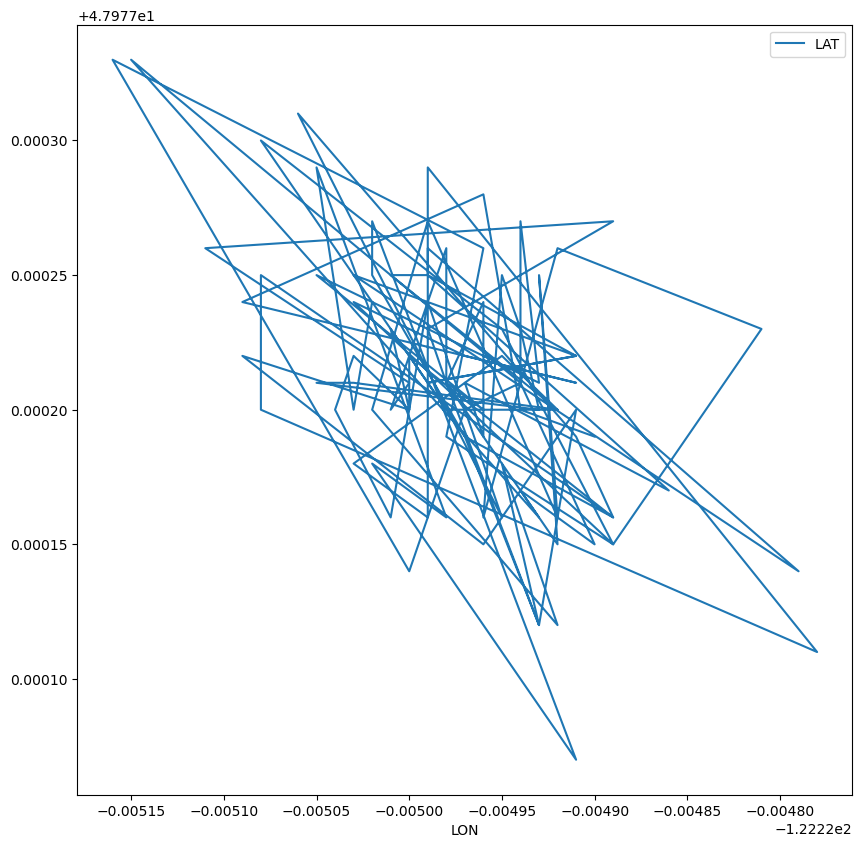

In [78]:
rec = rec1.loc[:100]
rec.plot(kind='line', x='LON', y='LAT', figsize=(10,10))
plt.show()

In [70]:
%%capture neveruse
# loitering = moving[MT_index[1]:MT_index[2]]
for loit in loitering_index:
    loitering = moving[loit:loit+m]
    loitering.plot(kind='line', x='x', y='y', figsize=(10,10))
    plt.xlim(moving['x'].min()-10, moving['x'].max()+10)
    plt.ylim(moving['y'].min()-10, moving['y'].max()+10)
    plt.savefig(f'./image/{MMSI}/{loit}.png')
del neveruse

In [26]:
small_fuca[small_fuca['MMSI']==366765940]

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo
12,366765940,2017-01-01T00:03:09,46.20044,-123.75889,0.0,-84.0,511.0,SEA CLIPPER,IMO7520633,WCZ2553,1001.0,undefined,25.06,7.32,NaN,NaN
22,366765940,2017-01-01T00:00:00,46.20045,-123.75886,0.0,-103.9,511.0,SEA CLIPPER,IMO7520633,WCZ2553,1001.0,undefined,25.06,7.32,NaN,NaN
23,366765940,2017-01-01T00:02:07,46.20043,-123.75890,0.0,-89.4,511.0,SEA CLIPPER,IMO7520633,WCZ2553,1001.0,undefined,25.06,7.32,NaN,NaN
380,366765940,2017-01-01T00:01:06,46.20044,-123.75889,0.0,-94.8,511.0,SEA CLIPPER,IMO7520633,WCZ2553,1001.0,undefined,25.06,7.32,NaN,NaN
410,366765940,2017-01-01T00:04:15,46.20045,-123.75887,0.0,-83.0,511.0,SEA CLIPPER,IMO7520633,WCZ2553,1001.0,undefined,25.06,7.32,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20629523,366765940,2017-12-31T18:53:08,46.90620,-124.10746,0.1,-73.4,511.0,SEA CLIPPER,IMO7520633,WCZ2553,1001.0,undefined,25.06,7.32,NaN,NaN
20635303,366765940,2017-12-31T20:32:29,46.90625,-124.10740,0.0,-106.4,511.0,SEA CLIPPER,IMO7520633,WCZ2553,1001.0,undefined,25.06,7.32,NaN,NaN
20637829,366765940,2017-12-31T21:15:49,46.90624,-124.10741,0.0,-136.8,511.0,SEA CLIPPER,IMO7520633,WCZ2553,1001.0,undefined,25.06,7.32,NaN,NaN
20638795,366765940,2017-12-31T21:35:28,46.90622,-124.10739,0.0,-136.8,511.0,SEA CLIPPER,IMO7520633,WCZ2553,1001.0,undefined,25.06,7.32,NaN,NaN


In [15]:
small_MMSI = list(small_fuca['MMSI'].unique())

In [16]:
small_MMSI

[367480370,
 366765940,
 366773090,
 367170860,
 367594860,
 366824910,
 316023608,
 316031048,
 367537320,
 316020067,
 316003447,
 316005715,
 316022038,
 366825190,
 367566980,
 316005623,
 367037240,
 367060330,
 316003668,
 368380000,
 316015632,
 316011982,
 316030644,
 316006922,
 366659730,
 366887930,
 316028702,
 316017162,
 367001820,
 316001125,
 366425240,
 367155110,
 367389230,
 316015742,
 367450580,
 367405340,
 366864000,
 316022149,
 316011649,
 477874000,
 366759130,
 316033419,
 366772760,
 368555000,
 366947000,
 316013431,
 303284000,
 366772990,
 366709780,
 367327250,
 366485000,
 367170270,
 366896490,
 367463310,
 366869780,
 367608860,
 303454000,
 366773030,
 366772750,
 366435740,
 366773110,
 316018772,
 366709770,
 367479990,
 316004106,
 366773060,
 316001821,
 477814200,
 338010000,
 369083000,
 316006155,
 564895000,
 367531220,
 367374040,
 316027744,
 367461720,
 338104000,
 316025573,
 316002500,
 338926959,
 338926955,
 367083650,
 369494181,
 316

In [17]:
nlen = len(small_MMSI)

In [32]:
has_loitering = {}
cur = 1
for MMSI in small_MMSI:
    # MMSI에 대한 기록 추출
    rec1 = small_fuca[small_fuca['MMSI'] == MMSI].sort_values('BaseDateTime', ascending=True).reset_index(drop=True)

    Dk = rec1['Length'].min() * 0.001 * 4.5
    # print(Dk)
    m = 60*5
    def is_stopping_point(prev, cur):
        a = prev[0] - cur['LAT']
        b = prev[1] - cur['LON']
        dist = math.sqrt((a*a + b*b)) * 111.32
        # print(dist)
        if dist < Dk:
            return True
        else:
            return False

    # stopping points 제거
    index = []      # moving points 저장하는 리스트
    moving_points = []
    cur_loc = rec1.loc[0]
    index.append(0)
    start_index = 0
    end_index = 0
    flag = -1
    moving_points.append((cur_loc['LAT'], cur_loc['LON']))

    for i in range(1, len(rec1)):
        cur_loc = rec1.loc[i]
        prev_loc = moving_points[-1]
        if is_stopping_point(prev_loc, cur_loc):
            if flag == 0:
                start_index = i
                flag = 1
        else:
            if flag == 1:
                end_index = i-1
                flag = 0
                term = pd.to_datetime(rec1['BaseDateTime'][end_index]) - pd.to_datetime(rec1['BaseDateTime'][start_index])
                if term < timedelta(minutes=60):
                    index.extend(x for x in range(start_index, end_index+1))
            elif flag == -1:
                flag = 0

            moving_points.append((cur_loc['LAT'], cur_loc['LON']))
            index.append(i)

    # moving points만 추출
    moving = rec1.reset_index(drop=True).iloc[index].reset_index()

    # grid mapping. z=16
    z = 16
    moving['x'] = ((moving["LON"] + 180) / 360) * (2 ** z)
    moving['y'] = (1 - np.log(np.tan(math.pi * moving["LAT"] / 180) + 1 / np.cos(math.pi * moving["LAT"] / 180)) / math.pi) * (2 ** (z - 1))

    # moving trajectory 시작 index 저장하기
    MT_index = []
    for i in range(1, len(moving['index'])):
        diff = moving['index'][i] - moving['index'][i-1]
        if diff > 1:
            MT_index.append(i)
    # print(len(MT_index))

    # n, c 계산
    cnt = 0
    loitering_index = []
    for i in tqdm(range(len(MT_index)-1)):
        if MT_index[i+1] - MT_index[i] < m: continue
        MT = moving.iloc[MT_index[i]:MT_index[i+1]]
        for k in range(0, len(MT)-m, 10):
            MT1 = MT.iloc[k:k+m]
            n_o = []
            for j in range(len(MT1)):
                n_o.append((np.floor(MT1.iloc[j]['x']), np.floor(MT1.iloc[j]['y'])))
            n_o = len(set(n_o))
            n_c = 0
            for j in range(len(MT1)-1):
                dx = np.abs(np.floor(MT1.iloc[j]['x']) - np.floor(MT1.iloc[j+1]['x']))
                dy = np.abs(np.floor(MT1.iloc[j]['y']) - np.floor(MT1.iloc[j+1]['y']))
                n_c += max(max(dx, dy)-1, 0)
            n = n_o + n_c
            c = ((np.ceil(MT1['x'].max()) - np.floor(MT1['x'].min())) + (np.ceil(MT1['y'].max()) - np.floor(MT1['y'].min()))) * 2
            if n >= c:
                cnt += 1
                loitering_index.append(MT_index[i]+k)
        #     print(n_o, n_c, n, c)
        # print(cnt)
    if cnt > 0:
        has_loitering[MMSI] = cnt
    print(f'{cnt} {cur}/{nlen}')
    del rec1, moving, MT

100%|██████████| 21/21 [00:15<00:00,  1.38it/s]


0 1/941


100%|██████████| 147/147 [18:18<00:00,  7.48s/it]


486 1/941


KeyboardInterrupt: 

In [2]:
small_fuca = pd.read_csv("./data/fuca/small_fuca.csv")

In [3]:
small_MMSI = list(small_fuca['MMSI'].unique())

In [5]:
%%capture neveruse
for MMSI in small_MMSI:
    df = small_fuca[small_fuca['MMSI'] == MMSI].sort_values('BaseDateTime', ascending=True).reset_index(drop=True)
    df.plot(kind='line', x='LON', y='LAT', figsize=(10,10))
    # plt.xlim(df['LON'].min()-1, df['LON'].max()+1)
    # plt.ylim(df['LAT'].min()-1, df['LAT'].max()+1)
    plt.savefig(f'./image/{MMSI}.png')
del neveruse

KeyboardInterrupt: 

NameError: name 'df' is not defined